<a href="https://colab.research.google.com/github/sangeethapk/AI-ML/blob/main/Assainment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.duplicated().sum()

np.int64(0)

In [3]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [4]:
#look for skwness
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.skew()

,0
Pregnancies,0.901674
Glucose,0.173754
BloodPressure,-1.843608
SkinThickness,0.109372
Insulin,2.272251
BMI,-0.428982
DiabetesPedigreeFunction,1.919911
Age,1.129597
Outcome,0.635017


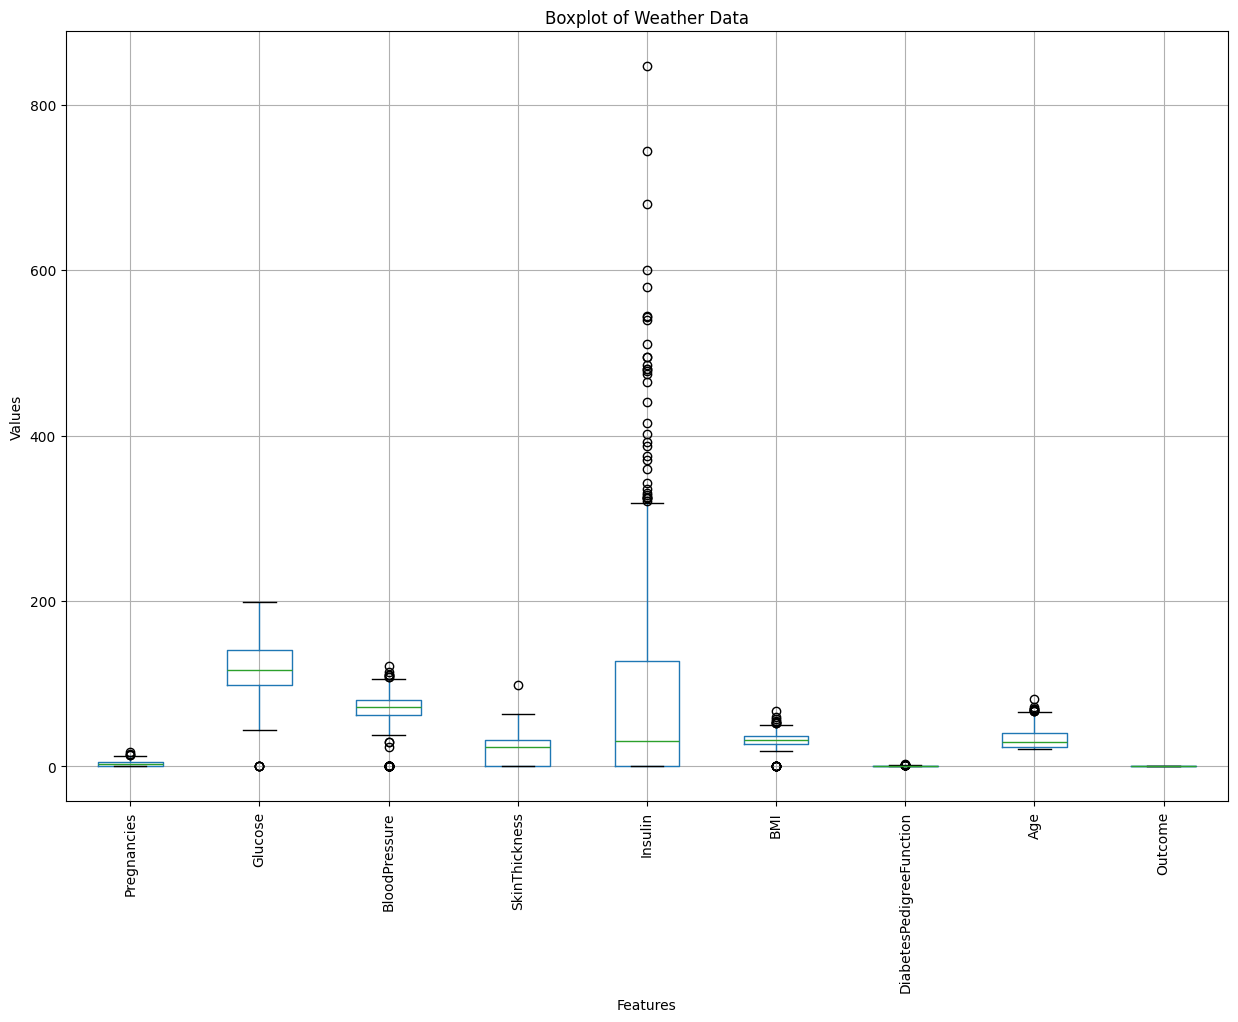

In [6]:
# go for boxplot for more details wide
import matplotlib.pyplot as plt
data.boxplot(figsize=(15,10))
plt.title('Boxplot of Weather Data')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Values')
plt.show()

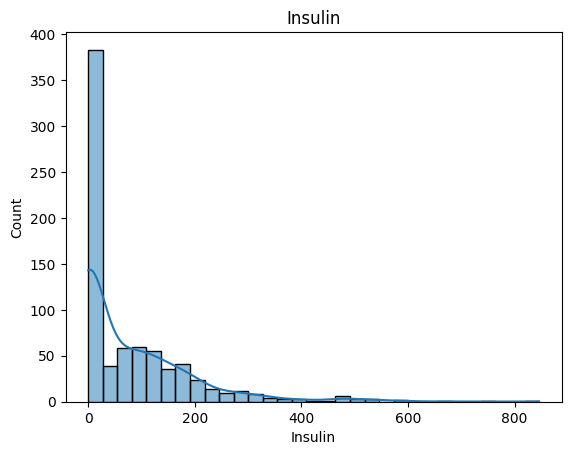

In [9]:
import seaborn as sns
sns.histplot(data['Insulin'], kde=True)
plt.title("Insulin")
plt.show()

In [11]:
Q1 = data['Insulin'].quantile(0.25)
Q3 = data['Insulin'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
data['Insulin'] = data['Insulin'].clip(lower=lower_bound, upper=upper_bound)

In [12]:
data['Insulin'].skew()

np.float64(1.1738981213083215)

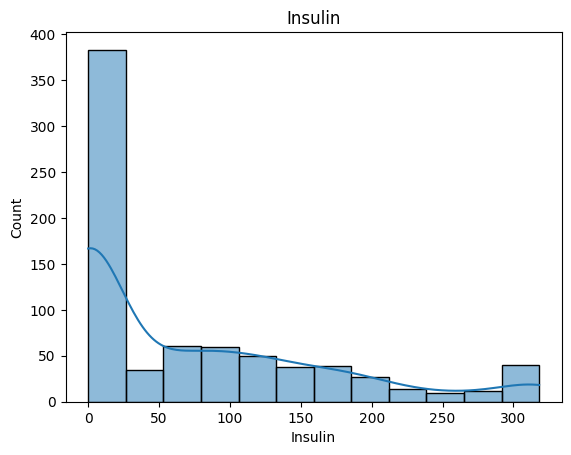

In [13]:
sns.histplot(data['Insulin'], kde=True)
plt.title("Insulin")
plt.show()

<Axes: >

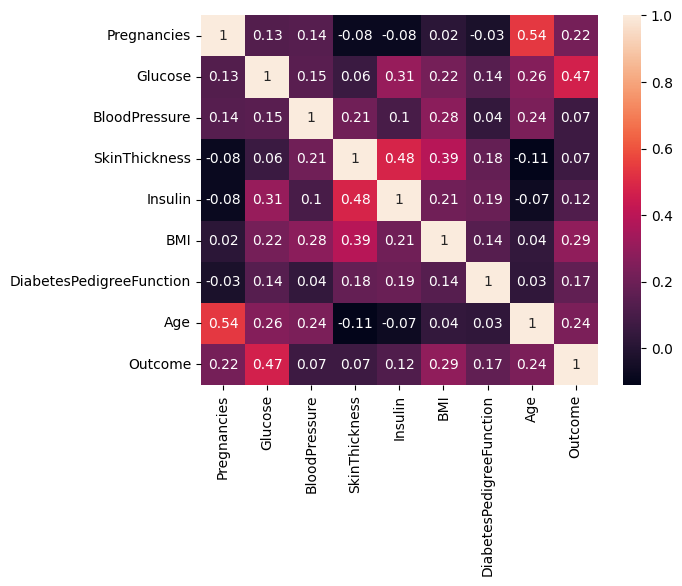

In [14]:
# heatmap
sns.heatmap(round(data.select_dtypes('number').corr(),2), annot=True)

No serious collinearity detected (no values > 0.8 between independent features)

In [18]:
# Calculate Class Imbalance Ratio
maj_cls = data['Outcome'].value_counts().max()
min_cls = data['Outcome'].value_counts().min()
ratio = maj_cls / min_cls

print(f"Class Imbalance Ratio: {ratio:.2f}")

Class Imbalance Ratio: 1.87


No need to SMOTE

In [21]:
# Feature and Target
from sklearn.model_selection import train_test_split
x = data.drop('Outcome', axis=1)
y = data['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
# Scale for model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [25]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)

LogisticRegression()

In [26]:

# Predictions
lr_test_pred = lr.predict(x_test_scaled)
lr_train_pred = lr.predict(x_train_scaled)

print('Logistic Regression Train Score:', accuracy_score(y_train, lr_train_pred))
print('Logistic Regression Test Score:', accuracy_score(y_test, lr_test_pred))

Logistic Regression Train Score: 0.7703583061889251
Logistic Regression Test Score: 0.7467532467532467


KNN

In [27]:
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

# Predictions
knn_test_pred = knn.predict(x_test_scaled)
knn_train_pred = knn.predict(x_train_scaled)

print('KNN Train Score:', accuracy_score(y_train, knn_train_pred))
print('KNN Test Score:', accuracy_score(y_test, knn_test_pred))

KNN Train Score: 0.8241042345276873
KNN Test Score: 0.7077922077922078


DecisionTree

In [28]:
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)

# Predictions
dt_test_pred = dt.predict(x_test_scaled)
dt_train_pred = dt.predict(x_train_scaled)

print('Decision Tree Train Score:', accuracy_score(y_train, dt_train_pred))
print('Decision Tree Test Score:', accuracy_score(y_test, dt_test_pred))

Decision Tree Train Score: 1.0
Decision Tree Test Score: 0.7467532467532467


Random Forest

In [29]:
rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)

# Predictions
rf_test_pred = rf.predict(x_test_scaled)
rf_train_pred = rf.predict(x_train_scaled)

print('Random Forest Train Score:', accuracy_score(y_train, rf_train_pred))
print('Random Forest Test Score:', accuracy_score(y_test, rf_test_pred))

Random Forest Train Score: 1.0
Random Forest Test Score: 0.7467532467532467


Nave Bayes

In [30]:
nb = GaussianNB()
nb.fit(x_train_scaled, y_train)

# Predictions
nb_test_pred = nb.predict(x_test_scaled)
nb_train_pred = nb.predict(x_train_scaled)

print('Naive Bayes Train Score:', accuracy_score(y_train, nb_train_pred))
print('Naive Bayes Test Score:', accuracy_score(y_test, nb_test_pred))

Naive Bayes Train Score: 0.745928338762215
Naive Bayes Test Score: 0.7532467532467533


Ada Boost

In [31]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train_scaled, y_train)

# Predictions
ada_test_pred = ada.predict(x_test_scaled)
ada_train_pred = ada.predict(x_train_scaled)

print('AdaBoost Train Score:', accuracy_score(y_train, ada_train_pred))
print('AdaBoost Test Score:', accuracy_score(y_test, ada_test_pred))

AdaBoost Train Score: 0.8029315960912052
AdaBoost Test Score: 0.7792207792207793


XGBoost

In [32]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train_scaled, y_train)

# Predictions
xgb_test_pred = xgb.predict(x_test_scaled)
xgb_train_pred = xgb.predict(x_train_scaled)

print('Gradient Boosting Train Score:', accuracy_score(y_train, xgb_train_pred))
print('Gradient Boosting Test Score:', accuracy_score(y_test, xgb_test_pred))

Gradient Boosting Train Score: 1.0
Gradient Boosting Test Score: 0.7142857142857143


Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(x_train_scaled, y_train)

# Predictions
gbm_test_pred = gbm.predict(x_test_scaled)
gbm_train_pred = gbm.predict(x_train_scaled)

print('Gradient Boosting Train Score:', accuracy_score(y_train, gbm_train_pred))
print('Gradient Boosting Test Score:', accuracy_score(y_test, gbm_test_pred))

Gradient Boosting Train Score: 0.9332247557003257
Gradient Boosting Test Score: 0.7402597402597403


SVC

In [34]:
svc = SVC()
svc.fit(x_train_scaled, y_train)

# Predictions
svc_test_pred = svc.predict(x_test_scaled)
svc_train_pred = svc.predict(x_train_scaled)

print('SVC Train Score:', accuracy_score(y_train, svc_train_pred))
print('SVC Test Score:', accuracy_score(y_test, svc_test_pred))

SVC Train Score: 0.8355048859934854
SVC Test Score: 0.7337662337662337


Final Data

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Dictionary of test predictions
predictions = {
    'Logistic Regression': lr_test_pred,
    'KNN': knn_test_pred,
    'Decision Tree': dt_test_pred,
    'Random Forest': rf_test_pred,
    'Naive Bayes': nb_test_pred,
    'AdaBoost': ada_test_pred,
    'XGBoost': xgb_test_pred,
    'Gradient Boosting': gbm_test_pred,
    'SVC': svc_test_pred
}

# Dictionary of train predictions (if available)
train_predictions = {
    'Logistic Regression': lr_train_pred,
    'KNN': knn_train_pred,
    'Decision Tree': dt_train_pred,
    'Random Forest': rf_train_pred,
    'Naive Bayes': nb_train_pred,
    'AdaBoost': ada_train_pred,
    'XGBoost': xgb_train_pred,
    'Gradient Boosting': gbm_train_pred,
    'SVC': svc_train_pred
}

# Initialize results dictionary
results = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Compute metrics for each model
for model_name in predictions.keys():
    y_train_pred = train_predictions[model_name]
    y_test_pred = predictions[model_name]

    results['Model'].append(model_name)
    results['Train Accuracy'].append(round(accuracy_score(y_train, y_train_pred), 4))
    results['Test Accuracy'].append(round(accuracy_score(y_test, y_test_pred), 4))
    results['Precision'].append(round(precision_score(y_test, y_test_pred, average='macro', zero_division=0), 4))
    results['Recall'].append(round(recall_score(y_test, y_test_pred, average='macro', zero_division=0), 4))
    results['F1 Score'].append(round(f1_score(y_test, y_test_pred, average='macro', zero_division=0), 4))

# Create a DataFrame from results
results_df = pd.DataFrame(results)

print(results_df)

                 Model  Train Accuracy  Test Accuracy  Precision  Recall  \
0  Logistic Regression          0.7704         0.7468     0.7245  0.7263   
1                  KNN          0.8241         0.7078     0.6798  0.6717   
2        Decision Tree          1.0000         0.7468     0.7262  0.7343   
3        Random Forest          1.0000         0.7468     0.7241  0.7222   
4          Naive Bayes          0.7459         0.7532     0.7337  0.7434   
5             AdaBoost          0.8029         0.7792     0.7600  0.7677   
6              XGBoost          1.0000         0.7143     0.6968  0.7091   
7    Gradient Boosting          0.9332         0.7403     0.7188  0.7253   
8                  SVC          0.8355         0.7338     0.7097  0.6960   

   F1 Score  
0    0.7253  
1    0.6749  
2    0.7294  
3    0.7231  
4    0.7372  
5    0.7632  
6    0.6996  
7    0.7215  
8    0.7010  


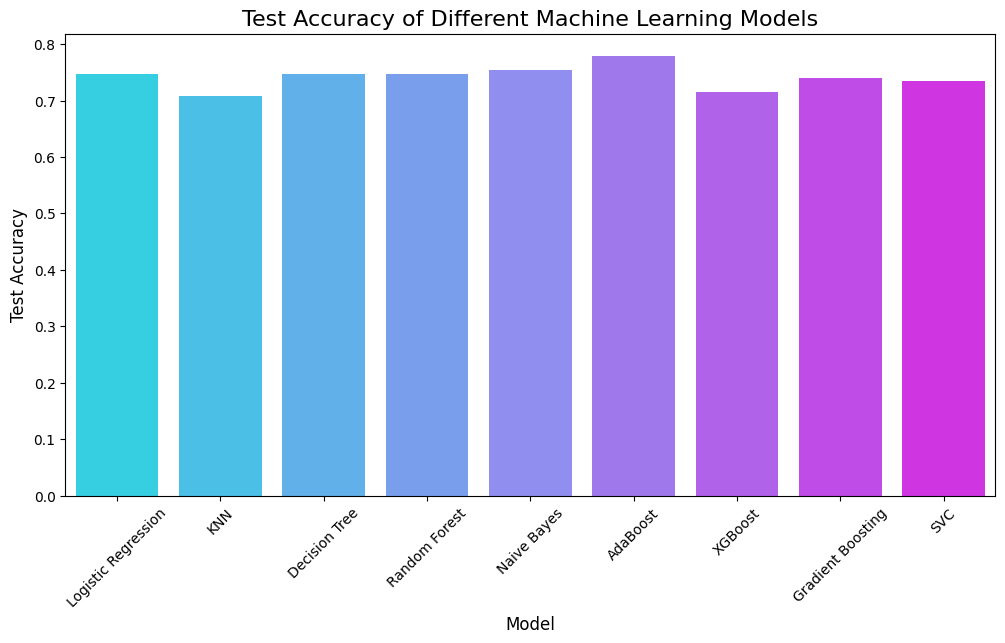

In [36]:
# Set the figure size
plt.figure(figsize=(12,6))

# Plot Test Accuracy for each model
sns.barplot(x='Model', y='Test Accuracy', data=results_df, palette='cool', hue='Model')

# Add title and axis labels
plt.title('Test Accuracy of Different Machine Learning Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

AdaBoost  0.78 is the Best Model